## Harmonize Data

Make sure to reproject so grids for all layers match up.
Check out the
[`ds.rio.reproject_match()` method](https://corteva.github.io/rioxarray/stable/examples/reproject_match.html#Reproject-Match)
from 
[rioxarray](https://corteva.github.io/rioxarray/stable/).

[Harmonize Video](https://cuboulder.zoom.us/rec/play/ekGBLwpW4gdtvlBstJrS_ehlAzq9INvK37XNdS8WKF-3WfE2xTiZmn1xIlFysuymN67yGbUeUJlpAwzS.HPT5luF6NWi8Ylsl?canPlayFromShare=true&from=share_recording_detail&continueMode=true&componentName=rec-play&originRequestUrl=https%3A%2F%2Fcuboulder.zoom.us%2Frec%2Fshare%2FgtkCgeowtvOgVPHDddcElI144wxCyHXOj1lKi5SEiMlxY1-L9Zm-PDBuTe6lh3Gm.S4X4wzflnTKXQtqr)

https://corteva.github.io/rioxarray/stable/examples/reproject_match.html

### Notes from Elsa Video

Working with climate data and elevation as example.

In [1]:
pip install --quiet ~/Documents/GitHub/landmapy

Note: you may need to restart the kernel to use updated packages.


In [3]:
from landmapy.habitat import create_data_dir
from landmapy.habitat import srtm_download, srtm_slope
from landmapy.habitat import process_maca, maca_year
from landmapy.habitat import ramp_logic

In [4]:
project_dir = create_data_dir('habitat')
elevation_dir = create_data_dir('habitat/srtm')

In [5]:
%store -r buffalo_gdf

Elevation Data

In [6]:
srtm_da = srtm_download(buffalo_gdf, elevation_dir, 0.1)
slope_da = srtm_slope(srtm_da)

/Users/brianyandell/miniconda3/envs/earth-analytics-python/lib/python3.11/site-packages/dask/dataframe/__init__.py:49: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


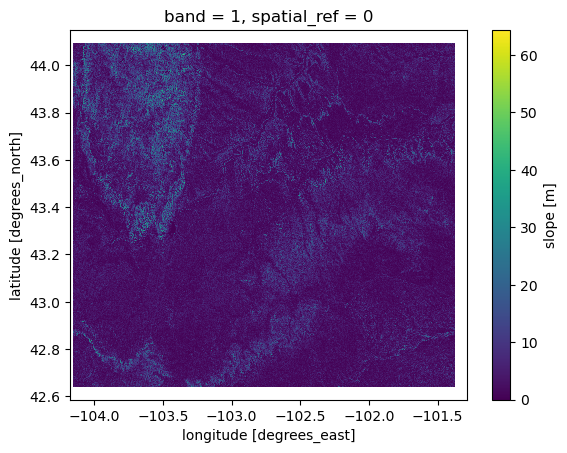

In [10]:
slope_da.plot()

Climate Data

In [14]:
maca_df = process_maca({'buffalo': buffalo_gdf})
maca_2027_year_da = maca_year(maca_df, 0, 2027)

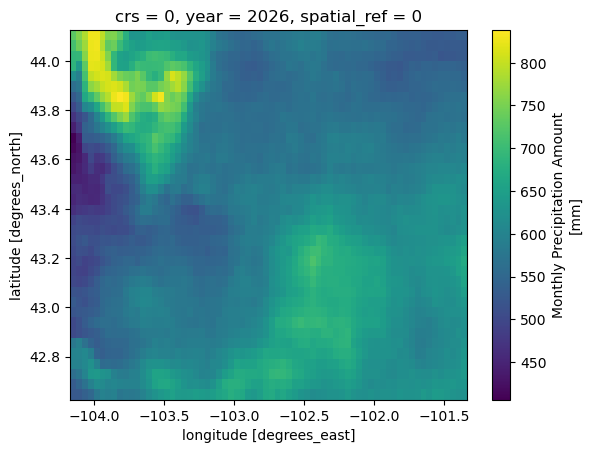

In [ ]:
maca_2027_year_da.plot()

Soil Data

In [21]:
%store -r buffalo_da

In [23]:
buffalo_sand_da = buffalo_da.rio.reproject_match(slope_da)

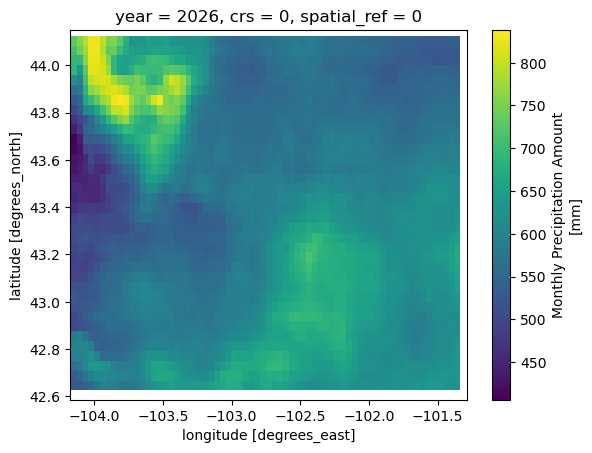

In [15]:
maca_2027_da = maca_2027_year_da.rio.reproject_match(slope_da)
maca_2027_da.plot()

In [24]:
maca_2027_da.shape, buffalo_sand_da.shape, slope_da.shape

((5680, 10504), (5680, 10504), (5680, 10504))

Set thresholds:

- sand at 55 to 85
- slope < 10
- pr above 650

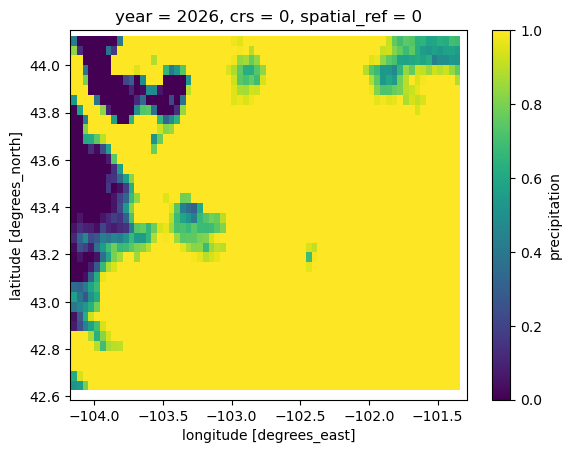

In [96]:
ramp_logic(maca_2027_da, (500, 550), (700, 750)).plot()

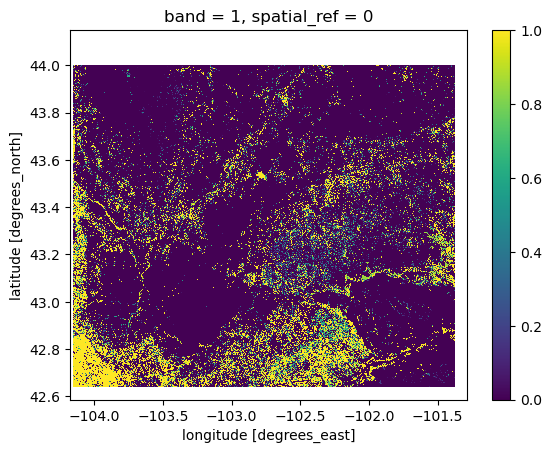

In [ ]:
ramp_logic(buffalo_sand_da, (50, 60), (80, 90)).plot()

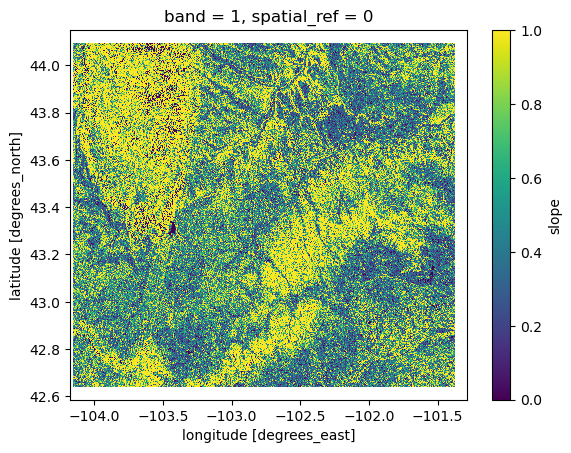

In [95]:
ramp_logic(slope_da, (0, 5), (15, 20)).plot()

### Code from Lilly:

In [ ]:
#Harmonize Data Layers: Ensure that each raster layer has consistent spatial resolution and projection.
“””To harmonize data layers, ensure that all raster layers have the same spatial resolution and projection. The function `rio.reproject_match()` from the `rioxarray` library can be used to 
reproject and align one raster layer to match the resolution, extent, and CRS of a reference raster layer. Use `ds.rio.reproject_match()` to align all raster grids.””
#Imports
import os
import rioxarray as rxr

def harmonize_raster_layers(reference_raster, input_rasters, output_dir):
    """
    Harmonize raster layers to ensure consistent spatial resolution and projection.
    Args:
        reference_raster (str): Path to the reference raster file that other rasters will match.
        input_rasters (list): List of paths to the input raster files to harmonize.
        output_dir (str): Directory to save the harmonized raster files.
    Returns:
        list: List of file paths to the harmonized raster files.
    """
    os.makedirs(output_dir, exist_ok=True)  # Create output directory if it doesn't exis

   # Load the reference raster
    ref_raster = rxr.open_rasterio(reference_raster, masked=True)
    harmonized_files = []
    for raster_path in input_rasters:
        # Load the input raster
        input_raster = rxr.open_rasterio(raster_path, masked=True)
        # Reproject and align the input raster to match the reference raster
        harmonized_raster = input_raster.rio.reproject_match(ref_raster)
        # Save the harmonized raster to the output directory
        output_file = os.path.join(output_dir, os.path.basename(raster_path))
        harmonized_raster.rio.to_raster(output_file)
        print(f"Harmonized raster saved to: {output_file}")
        harmonized_files.append(output_file)
    return harmonized_files